<div style="padding:5px; font-size: 24px; font-weight: bold; text-align: center">FINAL DECISION </div>

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

#Supress warnings
import warnings
warnings.filterwarnings("ignore")

<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:bold; font-style: italic">Data Processing And Preparation </div>

In [4]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Reading the Dataset
df_test = pd.read_csv('Test_data.csv')

In [6]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [7]:
df_test.shape

(23490, 13)

In [8]:
df_test = df_test.drop('employee_id', axis=1)

In [9]:
# Check for duplicate rows if any available
df_test.duplicated().sum()
df_test.drop_duplicates(inplace=True)
df_test.duplicated().sum()

0

In [10]:
#Since there are null values let us check for the count of missing values in each column
df_test.isnull().sum()

department                 0
region                     0
education               1030
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1797
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [11]:
# checking number of unique values in each column
df_test.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings          9
age                     41
previous_year_rating     5
length_of_service       34
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
dtype: int64

In [15]:
# Calculating Missing Values Percentage
100*(df_test.isna().mean()).sort_values(ascending = False)

previous_year_rating    7.658541
education               4.389703
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

<div style="padding:10px; font-size:18px; font-weight:bold; font-style: italic"><b> Categorical Column</div>

<b> so we are imputing the missing values using the mode for Categorical columns and Median for Numerical columns.

In [18]:
# education missing values to be imputed with mode
df_test['education'].fillna(df_test['education'].mode()[0], inplace=True)

<div style="padding:10px; font-size:18px; font-weight:bold; font-style: italic"><b> Numerical Column</div>

<b> checking Outliers

In [21]:
#Calculate Q1 (25th percentile) and Q3 (75th percentile)
quartile_1 = df_test['previous_year_rating'].quantile(0.25)
quartile_3 = df_test['previous_year_rating'].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = quartile_3 - quartile_1

# Define lower and upper bounds for outliers
lower_bound = quartile_1 - 1.5 * IQR
upper_bound = quartile_3 + 1.5 * IQR

# Filter out the outliers
outliers = df_test[(df_test['previous_year_rating'] < lower_bound) | 
                       (df_test['previous_year_rating'] > upper_bound)]

# Print the number of outliers found
print("Number of outliers in 'previous_year_rating':", outliers.shape[0])

Number of outliers in 'previous_year_rating': 2679


In [22]:
# Using the median based on the above output
df_test['previous_year_rating'].fillna(df_test['previous_year_rating'].median(), inplace=True)

In [23]:
#verify that there is not any missing values
df_test.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [24]:
#Train-Test Split
# Create X and y
X = df_test.drop('previous_year_rating', axis=1)
y = df_test['previous_year_rating']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [25]:
import xgboost as xgb
# Adjust target variable labels to start from 0
y = y - 1  # Subtract 1 from each class label to make it start from 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test)

In [26]:
# CatBoost
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_test)

In [27]:
import lightgbm as lgb
# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 18771, number of used features: 51
[LightGBM] [Info] Start training from score -2.169640
[LightGBM] [Info] Start training from score -2.616773
[LightGBM] [Info] Start training from score -0.876012
[LightGBM] [Info] Start training from score -1.715918
[LightGBM] [Info] Start training from score -1.530145


In [28]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])

def evaluate_model(y_true, y_pred, model_name, y_probs=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multiclass
    rec = recall_score(y_true, y_pred, average='macro')      # Use 'macro' for multiclass
    f1 = f1_score(y_true, y_pred, average='macro')            # Use 'macro' for multiclass
    auc = roc_auc_score(y_true, y_probs, average='macro', multi_class='ovr') if y_probs is not None else np.nan  # For multiclass AUC
    return {'Model': model_name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1, 'AUC': auc}

# XGBoost
xgb_probs = xgb_model.predict_proba(X_test)
xgb_metrics = evaluate_model(y_test, xgb_preds, 'XGBoost', xgb_probs)
metrics_df = pd.concat([metrics_df, pd.DataFrame([xgb_metrics])], ignore_index=True)

# CatBoost
cat_probs = cat_model.predict_proba(X_test)
cat_metrics = evaluate_model(y_test, cat_preds, 'CatBoost', cat_probs)
metrics_df = pd.concat([metrics_df, pd.DataFrame([cat_metrics])], ignore_index=True)

# LightGBM
lgb_probs = lgb_model.predict_proba(X_test)
lgb_metrics = evaluate_model(y_test, lgb_preds, 'LightGBM', lgb_probs)
metrics_df = pd.concat([metrics_df, pd.DataFrame([lgb_metrics])], ignore_index=True)

print(metrics_df)

      Model  Accuracy  Precision    Recall        F1       AUC
0   XGBoost  0.450671   0.326642  0.295397  0.269893  0.682310
1  CatBoost  0.449819   0.299481  0.294771  0.270962  0.683805
2  LightGBM  0.453441   0.309406  0.290073  0.253601  0.686532


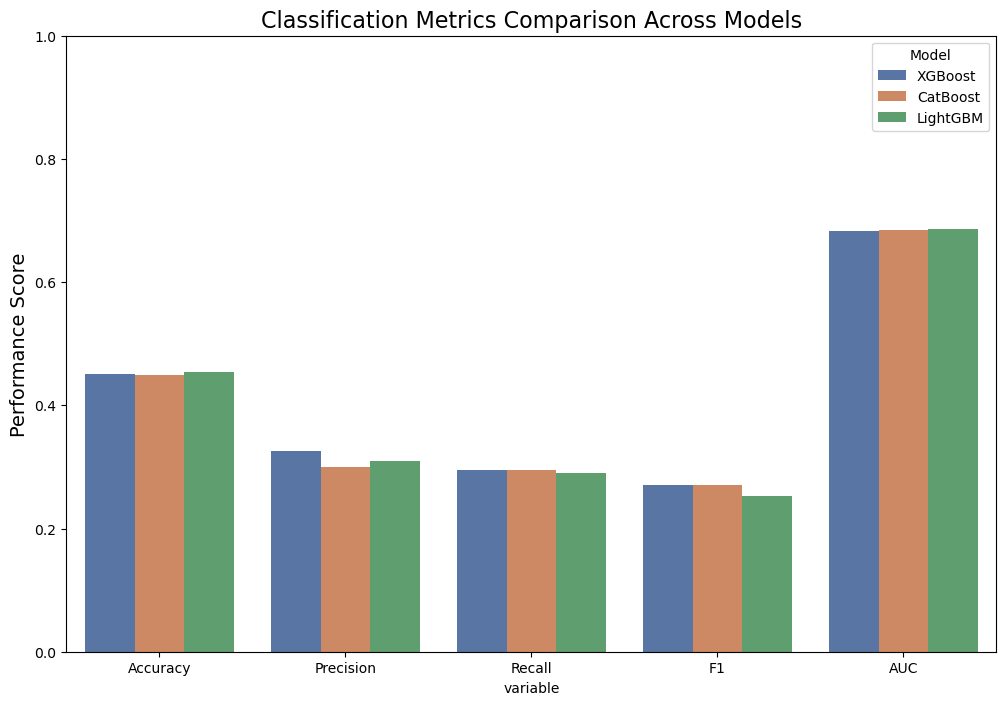

In [29]:
 Visualisation of the models
sns.set_palette('deep')
plt.figure(figsize=(12,8))
melted = metrics_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
sns.barplot(x='variable', y='value', hue='Model', data=melted)
plt.title('Classification Metrics Comparison Across Models',fontsize=16)
plt.ylabel('Performance Score', fontsize=14)
plt.ylim(0,1)
plt.show()

In [ ]:
# Initialize a list to hold the results
#BGBOOST RESULTS AND BEST PREDICTED
scaler_dict = {
    'robust': RobustScaler(),
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'maxabs': MaxAbsScaler()
}
# Initialize a list to hold the results
results = []

# Loop through scalers
for scaler_name, scaled_df in scaled_datasets.items():
    # Prepare data
    X_data = scaled_df[[
        "department", "education", "age", "gender", "recruitment_channel",
        "avg_training_score", "length_of_service", "awards_won?"
    ]]
    y_data = scaled_df["KPIs_met >80%"].apply(lambda x: 1 if x == 1 else 0)
    
    # Encode categoricals
    X_encoded = X_data.copy()
    categorical_cols = ["department", "education", "gender", "recruitment_channel"]
    le = LabelEncoder()
    for col in categorical_cols:
        X_encoded[col] = le.fit_transform(X_encoded[col])
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

    # Scale features using the selected scaler
    scaler = scaler_dict[scaler_name.lower()]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({
        'Scaler': scaler_name,
        'Model': 'XGBoost',
        'Accuracy': accuracy,
        'AUC-ROC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort by accuracy (or any other metric you prefer)
best_results = results_df.sort_values(by='Accuracy', ascending=False)

# Display the best results
print("Best Results (Highest Accuracy):")
print(best_results.head())

# Document the best scaler and model combination
best_scaler_model = best_results.iloc[0]
print("\nBest Scaler and Model Combination:")
print(f"Scaler: {best_scaler_model['Scaler']}")
print(f"Model: {best_scaler_model['Model']}")
print(f"Accuracy: {best_scaler_model['Accuracy']}")
print(f"Precision: {best_scaler_model['Precision']}")
print(f"Recall: {best_scaler_model['Recall']}")
print(f"F1 Score: {best_scaler_model['F1 Score']}")
print(f"AUC-ROC: {best_scaler_model['AUC-ROC']}")

# Optionally, you can visualize the confusion matrix for the best model
print(f"Confusion Matrix for Best Model:\n{best_scaler_model['Confusion Matrix']}")


In [ ]:
# Initialize a list to hold the results
# RESULTS AND BEST PREDICTED
scaler_dict = {
    'robust': RobustScaler(),
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'maxabs': MaxAbsScaler()
}
# Initialize a list to hold the results
results = []

# Loop through scalers
for scaler_name, scaled_df in scaled_datasets.items():
    # Prepare data
    X_data = scaled_df[[
        "department", "education", "age", "gender", "recruitment_channel",
        "avg_training_score", "length_of_service", "awards_won?"
    ]]
    y_data = scaled_df["KPIs_met >80%"].apply(lambda x: 1 if x == 1 else 0)
    
    # Encode categoricals
    X_encoded = X_data.copy()
    categorical_cols = ["department", "education", "gender", "recruitment_channel"]
    le = LabelEncoder()
    for col in categorical_cols:
        X_encoded[col] = le.fit_transform(X_encoded[col])
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

    # Scale features using the selected scaler
    scaler = scaler_dict[scaler_name.lower()]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
   # CatBoost
    cat_model = CatBoostClassifier(verbose=0)
    cat_model.fit(X_train_scaled, y_train)

    y_pred = cat_model.predict(X_test_scaled)
    y_proba = cat_model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({
        'Scaler': scaler_name,
        'Model': 'CatBoost',
        'Accuracy': accuracy,
        'AUC-ROC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort by accuracy (or any other metric you prefer)
best_results = results_df.sort_values(by='Accuracy', ascending=False)

# Display the best results
print("Best Results (Highest Accuracy):")
print(best_results.head())

# Document the best scaler and model combination
best_scaler_model = best_results.iloc[0]
print("\nBest Scaler and Model Combination:")
print(f"Scaler: {best_scaler_model['Scaler']}")
print(f"Model: {best_scaler_model['Model']}")
print(f"Accuracy: {best_scaler_model['Accuracy']}")
print(f"Precision: {best_scaler_model['Precision']}")
print(f"Recall: {best_scaler_model['Recall']}")
print(f"F1 Score: {best_scaler_model['F1 Score']}")
print(f"AUC-ROC: {best_scaler_model['AUC-ROC']}")

# Optionally, you can visualize the confusion matrix for the best model
print(f"Confusion Matrix for Best Model:\n{best_scaler_model['Confusion Matrix']}")

In [ ]:
# Initialize a list to hold the results
#BGBOOST RESULTS AND BEST PREDICTED
scaler_dict = {
    'robust': RobustScaler(),
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'maxabs': MaxAbsScaler()
}
# Initialize a list to hold the results
results = []

# Loop through scalers
for scaler_name, scaled_df in scaled_datasets.items():
    # Prepare data
    X_data = scaled_df[[
        "department", "education", "age", "gender", "recruitment_channel",
        "avg_training_score", "length_of_service", "awards_won?"
    ]]
    y_data = scaled_df["KPIs_met >80%"].apply(lambda x: 1 if x == 1 else 0)
    
    # Encode categoricals
    X_encoded = X_data.copy()
    categorical_cols = ["department", "education", "gender", "recruitment_channel"]
    le = LabelEncoder()
    for col in categorical_cols:
        X_encoded[col] = le.fit_transform(X_encoded[col])
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

    # Scale features using the selected scaler
    scaler = scaler_dict[scaler_name.lower()]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
  
    # LightGBM
    lgbm_model = LGBMClassifier()
    lgbm_model.fit(X_train_scaled, y_train)
    
    y_pred = lgbm_model.predict(X_test_scaled)
    y_proba = lgbm_model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({
        'Scaler': scaler_name,
        'Model': 'LightGBM',
        'Accuracy': accuracy,
        'AUC-ROC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort by accuracy (or any other metric you prefer)
best_results = results_df.sort_values(by='Accuracy', ascending=False)

# Display the best results
print("Best Results (Highest Accuracy):")
print(best_results.head())

# Document the best scaler and model combination
best_scaler_model = best_results.iloc[0]
print("\nBest Scaler and Model Combination:")
print(f"Scaler: {best_scaler_model['Scaler']}")
print(f"Model: {best_scaler_model['Model']}")
print(f"Accuracy: {best_scaler_model['Accuracy']}")
print(f"Precision: {best_scaler_model['Precision']}")
print(f"Recall: {best_scaler_model['Recall']}")
print(f"F1 Score: {best_scaler_model['F1 Score']}")
print(f"AUC-ROC: {best_scaler_model['AUC-ROC']}")

# Optionally, you can visualize the confusion matrix for the best model
print(f"Confusion Matrix for Best Model:\n{best_scaler_model['Confusion Matrix']}")

<b>Among the three models, LightGBM with StandardScaler has the highest accuracy (65.26%), precision (55.4%), and AUC-ROC (0.624) according to the results, indicating that it better prevents false positives, which inadvertently reward underperforming performance. Its weaker recall, however, suggests that it might overlook some high performers. All things considered, LightGBM is the ideal model if achieving accuracy and balanced performance is more important than capturing every high performer.